## Gradient Descent

In Machine Learning, we design a system that can learn from data.

The general way machine learning algorithms work is by optimizing a cost function.

Gradient descent is a first-order iterative optimization algorithm. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point. If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.

Gradient descent|ascent is an algorithm for solving optimization problems. In gradient descent, I would like to find the solution which minimizes the cost function. In gradient ascent (which is the case of logistic regression), I will be maximizing the likelihood.

In statistics, a likelihood function (often simply the likelihood) is a function of the parameters of a statistical 
model given data. Likelihood functions play a key role in statistical inference, especially methods of estimating a parameter from a set of statistics. In informal contexts, "likelihood" is often used as a synonym for "probability." In statistics, a distinction is made depending on the roles of outcomes vs. parameters. Probability is used before data are available to describe possible future outcomes given a fixed value for the parameter (or parameter vector). Likelihood is used after data are available to describe a function of a parameter (or parameter vector) for a given outcome.

---
alpha is a parameter in our algorithm, generally called the step size or learning rate.

If alpha is too small, it will take a really long time to converge.

If alpha is too large, we'll actually end up overshooting the optimal value and keep getting further and further away! So in this case it will diverge!

---
**Cost function**


The cost function C is an important concept in learning, as it is a measure of how far away a particular solution is from an optimal solution to the problem to be solved. Learning algorithms search through the solution space to find a function that has the smallest possible cost.

log likelihood

 sigmoid function refers to the special case of the logistic function shown in the first figure and defined by the formula

 $   S(t)={\frac {1}{1+e^{-t}}}$

A graph of the logistic function on the t-interval 

Let us assume that ${\displaystyle t}$  is a linear function of a single explanatory variable ${\displaystyle x}$ (the case where ${\displaystyle t}$ is a linear combination of multiple explanatory variables is treated similarly). We can then express ${\displaystyle t}$ as follows:

  $ t=\beta _{0}+\beta _{1}x$

And the logistic function can now be written as:

  $ F(x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}} $

Note that ${\displaystyle F(x)}$ is interpreted as the probability of the dependent variable equaling a "success" or "case" rather than a failure or non-case. It's clear that the response variables ${\displaystyle Y_{i}} Y_{i}$ are not identically distributed: ${\displaystyle P(Y_{i}=1\mid X)} P(Y_{i}=1\mid X)$ differs from one data point ${\displaystyle X_{i}} X_{i}$ to another, though they are independent given design matrix ${\displaystyle X}$ and shared with parameters ${\displaystyle \beta }$


Definition of the inverse of the logistic function
We can now define the inverse of the logistic function, g {\displaystyle g} g, the logit (log odds):

  $  g(F(x))=\ln \left({\frac {F(x)}{1-F(x)}}\right)=\beta _{0}+\beta _{1}x,
$

and equivalently, after exponentiating both sides:

 $   {\frac {F(x)}{1-F(x)}}=e^{\beta _{0}+\beta _{1}x}.
$


---

The particular model used by logistic regression, which distinguishes it from standard linear regression and from other types of regression analysis used for binary-valued outcomes, is the way the probability of a particular outcome is linked to the linear predictor function:

  $ \operatorname {logit} (\mathbb {E} [Y_{i}\mid x_{1,i},\ldots ,x_{m,i}])=\operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)=\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta _{m}x_{m,i}
$

Written using the more compact notation described above, this is:

 $  \operatorname {logit} (\mathbb {E} [Y_{i}\mid \mathbf {X} _{i}])=\operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)={\boldsymbol {\beta }}\cdot \mathbf {X} _{i}
 $
This


An equivalent formula uses the inverse of the logit function, which is the logistic function, i.e.:

  $   {E} [Y_{i}\mid \mathbf {X} _{i}]=p_{i}=\operatorname {logit} ^{-1}({\boldsymbol {\beta }}\cdot \mathbf {X} _{i})={\frac {1}{1+e^{-{\boldsymbol {\beta }}\cdot \mathbf {X} _{i}}}}$


$y_i = \beta_1 x_{i1} + \cdots + \beta_p x_{ip} + \varepsilon_i = \mathbf{x}^{\rm T}_i\boldsymbol\beta + \varepsilon_i,
 \qquad i = 1, \ldots, n,$
 
 where:
 
 $\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad$
 
 $\mathbf{X} = \begin{pmatrix} \mathbf{x}^{\rm T}_1 \\ \mathbf{x}^{\rm T}_2 \\ \vdots \\ \mathbf{x}^{\rm T}_n \end{pmatrix}
 = \begin{pmatrix} x_{11} & \cdots & x_{1p} \\
 x_{21} & \cdots & x_{2p} \\
 \vdots & \ddots & \vdots \\
 x_{n1} & \cdots & x_{np}
 \end{pmatrix}, $
 
 
 $\boldsymbol\beta = \begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{pmatrix}, \quad
 \boldsymbol\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.$

In [1]:
from __future__ import division

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%autoreload 2
%matplotlib inline
plt.style.use('ggplot')

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=0)

In [3]:
y[:5]

array([0, 0, 0, 1, 1])

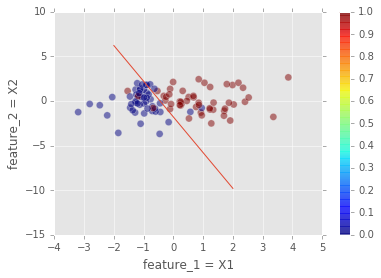

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50) # feature_1 = X[:,0], feature_2 = X[:,1]
plt.xlabel('feature_1 = X1')
plt.ylabel('feature_2 = X2')
plt.colorbar()

eyeline = np.linspace(-2, 2)
plt.plot(eyeline, -4*eyeline - 1.8)
plt.show()

#plt.plot(X[:,0], -X[:,0]*b1/b2-b0/b2)
#plt.ylim(-5,5)
#plt.legend()

---
    |  x1 |  x2 |   y |
    | --- | --- | --- |
    |   0 |   1 |   1 |
    |   2 |   2 |   0 |


In [5]:
y0 = 1
y1 = 0

# Xj,i column,row

x1_0 = 0
x1_1 = 2

x2_0 = 1
x2_1 = 2

---
** The "logistic" function of any number $\alpha$ is given by the inverse-logit: **

where hθ(x) is defined as follows:

the logistic function = $h_{\theta}(x) $

$\theta x^i:=\theta_0+\theta_1 x^i_1+\dots+\theta_p x^i_p$

$   h_{\theta}(x)=g(\theta^{T}x)={\frac {1}{1+e^{-{\boldsymbol {\beta }}\cdot \mathbf {X} _{i}}}}$


In [6]:
h0 = 1. / (1. + np.exp(-1*x1_0 -1*x2_0))

In [7]:
print 'h(0,1):', h0

h(0,1): 0.73105857863


In [8]:
h1 = 1. / (1. + np.exp(-1*x1_1 -1*x2_1))

In [9]:
print 'h(2,2):', h1

h(2,2): 0.982013790038


---
Cost

** Cost function for Logistic Regression**

log_likelihood:

$ L(\theta)=\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$

In [10]:
cost = y0*np.log(h0)+(1-y0)*np.log(1-h0) + y1*np.log(h1) + (1-y1)*np.log(1-h1)

In [11]:
print 'cost:', cost

cost: -4.33141161544


---
Gradient

**Gradient of the cost function**

$\frac{\partial}{\partial\theta_{j}}L(\theta) =\sum_{i=1}^{m}(y^i - h_\theta(x^{i}))x_j^i$

In [14]:
# gradient feature 1
gx1 = (y0-h0)*x1_0 + (y1-h1)*x1_1

In [15]:
print 'Gradient descend:', gx1

Gradient descend: -1.96402758008


In [16]:
# gradient feature 2
gx2 = (y0-h0)*x2_0 + (y1-h1)*x2_1

In [17]:
print 'Gradient descend:', gx2

Gradient descend: -1.69508615871


In [18]:
x_t = np.transpose(np.array([[0, 1],[2, 2]]))
x_ = np.array([[0, 1],[2, 2]])
y_ = np.array([1, 0])

B_t = np.array([[1,1]])
coeffs = np.array([1,1])

---
**Logistic function or the sigmoid function:**

$h_\theta(x^i)=\frac{1}{1+e^{-\theta x^i} }$

In [21]:
# with x --> NOT transposed
def h(x, b):
    return 1. / (1. + np.exp(-np.dot(x, coeffs)))

In [22]:
h(x_, B_t) # row vector

array([ 0.73105858,  0.98201379])

In [23]:
h(x_, coeffs) # row vector

array([ 0.73105858,  0.98201379])

In [24]:
def predict(X, coeffs):
    return h(X, coeffs).round()

In [25]:
predict(X, coeffs)

array([ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.])

---
**Cost function:**

maximize the log likelihood + lasso ridge


$ L(\theta)=\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i})) +  \lambda\sum _{j=1}^{p} |\beta _{j}|_{}^{2} $ 

In [30]:
def log_likelihood_gradient(X, y, coeffs, lbda=1):
    dlreg = 2*coeffs
    y = y.reshape(len(y), 1) # column vector
    dif = (y - h(X, coeffs)).T
    
    return dif.dot(X) + dlreg

In [31]:
log_likelihood_gradient(X, y, coeffs, lbda=1)

array([[ 49.90219155,   6.83036927],
       [ 49.05877566,   6.4015678 ],
       [ 48.56264534,   6.14932995],
       [ 52.66858629,   8.23683331],
       [ 55.84014443,   9.84928667],
       [ 56.04312298,   9.95248309],
       [ 48.14313667,   5.93604735],
       [ 46.70556425,   5.20517049],
       [ 50.24091067,   7.00257762],
       [ 51.81654844,   7.80364835],
       [ 47.13240883,   5.42218274],
       [ 54.39831192,   9.11624393],
       [ 51.25528359,   7.51829542],
       [ 47.77891888,   5.75087522],
       [ 50.21911069,   6.99149428],
       [ 50.63763223,   7.20427501],
       [ 46.93811196,   5.32340017],
       [ 52.01754321,   7.9058362 ],
       [ 53.00691768,   8.40884453],
       [ 48.30033726,   6.01596978],
       [ 52.59500774,   8.19942521],
       [ 50.34969814,   7.0578863 ],
       [ 54.47849319,   9.15700893],
       [ 55.91851137,   9.88912925],
       [ 53.37431765,   8.59563452],
       [ 46.85659168,   5.28195441],
       [ 54.21144681,   9.02123975],
 

---

In [59]:
import Gradient_functions as gf

In [60]:
gf.hypothesis(X, coeffs)

array([[ 0.35830466],
       [ 0.2703791 ],
       [ 0.21865783],
       [ 0.64669953],
       [ 0.97733243],
       [ 0.99849281],
       [ 0.17492432],
       [ 0.02505832],
       [ 0.39361591],
       [ 0.55787513],
       [ 0.06955659],
       [ 0.82702232],
       [ 0.49936363],
       [ 0.13695485],
       [ 0.39134328],
       [ 0.43497388],
       [ 0.04930127],
       [ 0.57882871],
       [ 0.68197036],
       [ 0.19131238],
       [ 0.63902902],
       [ 0.40495693],
       [ 0.83538116],
       [ 0.98550213],
       [ 0.72027157],
       [ 0.04080283],
       [ 0.80754175],
       [ 0.48797363],
       [ 0.31744954],
       [ 0.26515785],
       [ 0.94218329],
       [ 0.21270317],
       [ 0.58713867],
       [ 0.01148021],
       [ 0.52118519],
       [ 0.53968123],
       [ 0.15686858],
       [ 0.90937554],
       [ 0.74562756],
       [ 0.61038217],
       [ 0.27479901],
       [ 0.50964648],
       [ 0.08449161],
       [ 0.4446448 ],
       [ 0.00433058],
       [ 0

In [61]:
gf.predict(X, coeffs)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [62]:
gf.log_likelihood(X, y, coeffs, 0)

-10174.362285674944

In [63]:
gf.log_likelihood_gradient(X, y, coeffs)

array([ 24.12309126, -16.79387038])

---

In [64]:
from Gradient_functions import log_likelihood, log_likelihood_gradient, predict

In [65]:
from Gradient_class import GradientAscent

In [66]:
# __init__(self, cost, gradient, predict_func, fit_intercept=True, scale=False)
gd = GradientAscent(log_likelihood, log_likelihood_gradient, predict)

In [67]:
gd.run(X, y)


Cost fn: -6931.281859
Cost fn: 21145.3032014
Cost fn: 53583.0460687
Cost fn: 91888.8947545
Cost fn: 140074.21791
Cost fn: 203135.544726
Cost fn: 288053.20045
Cost fn: 404897.38785
Cost fn: 568375.610742
Cost fn: nan
